<Axes: >

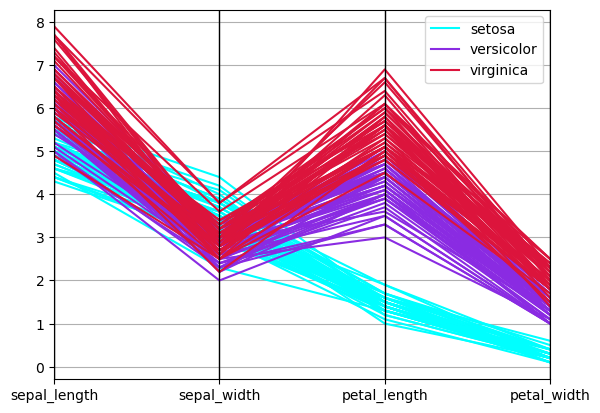

In [1]:
import seaborn as sns
import pandas as pd 
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

data = sns.load_dataset('iris').dropna()


pd.plotting.parallel_coordinates(data, 'species',color = ('#00FFFF','#8A2BE2','#DC143C'))

<Axes: >

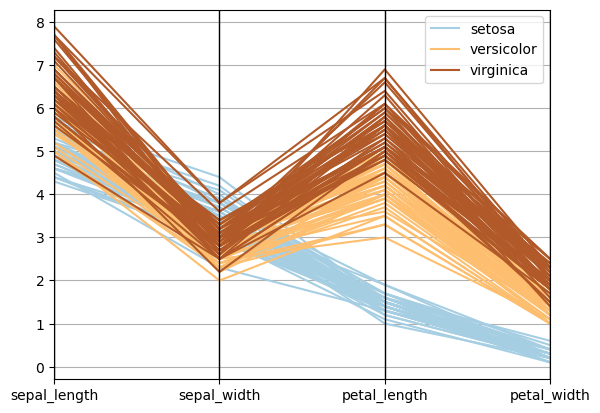

In [2]:
pd.plotting.parallel_coordinates(data, 'species',colormap = 'Paired')

<Axes: >

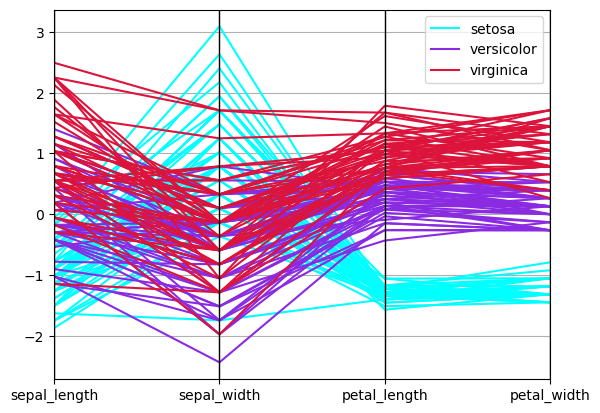

In [3]:
data2 = zscore(data.iloc[:,0:4])

data2['species'] = data['species']

pd.plotting.parallel_coordinates(data2, 'species',color = ('#00FFFF','#8A2BE2','#DC143C'))


In [4]:
diamonds = sns.load_dataset('diamonds').dropna()

print(diamonds.head())

# let's look at the different categorical variables as classes seperately

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [5]:
# Create three different dataframes for class, dropping out the other two

# First lets do it without zscore scaling and the with

diamondscut = diamonds.drop(['color','clarity'],axis = 1)

diamondscolor = diamonds.drop(['cut','clarity'],axis = 1)

diamondsclarity = diamonds.drop(['color','cut'],axis = 1)

<Axes: >

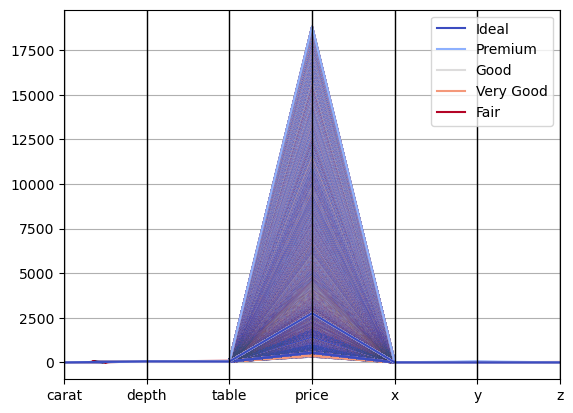

In [6]:
# now lets see what the different parallel plots look like without scaling

pd.plotting.parallel_coordinates(diamondscut, 'cut',colormap = 'coolwarm')

# this clearly shows us that we need to scale because our features 
# are all in different amounts so lets scale and replot

<Axes: >

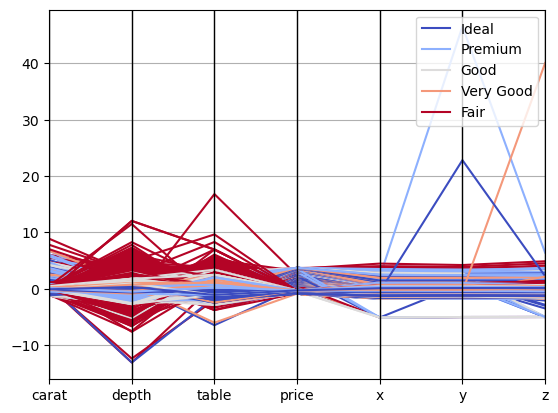

In [7]:
diamondscut2 = zscore(diamondscut.drop(['cut'],axis = 1))

diamondscut2['cut'] = diamondscut['cut']

pd.plotting.parallel_coordinates(diamondscut2, 'cut',colormap = 'coolwarm')

# now with scaling we can see it a little better
# lets repeat the process for the other two but just scaled

<Axes: >

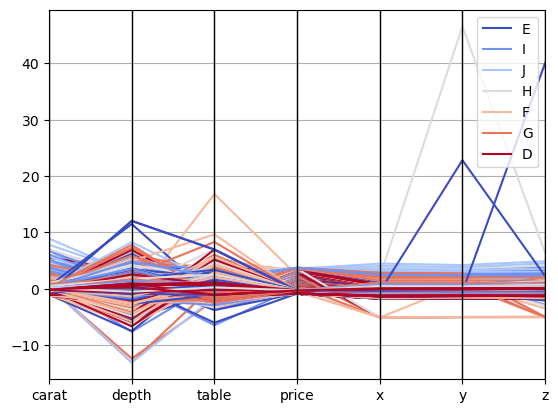

In [8]:
diamondscolor2 = zscore(diamondscolor.drop(['color'],axis = 1))

diamondscolor2['color'] = diamondscolor['color']

pd.plotting.parallel_coordinates(diamondscolor2, 'color',colormap = 'coolwarm')

<Axes: >

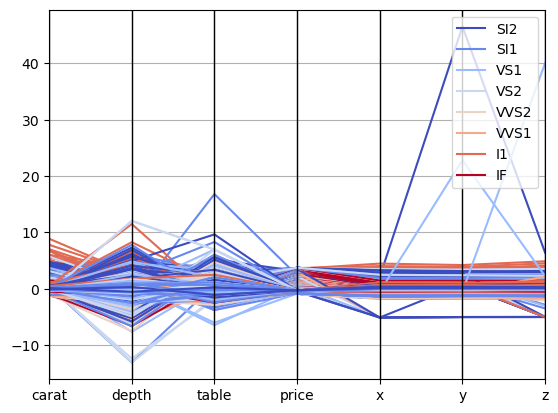

In [9]:
diamondsclarity2 = zscore(diamondsclarity.drop(['clarity'],axis = 1))

diamondsclarity2['clarity'] = diamondsclarity['clarity']

pd.plotting.parallel_coordinates(diamondsclarity2, 'clarity',colormap = 'coolwarm')

### Comments

For the Diamonds dataset, scaling was necessary to create a visualization with any meaning. This was due to the different features being in different scales like 0-400 ish, 0-3 ish etc.

<Axes: >

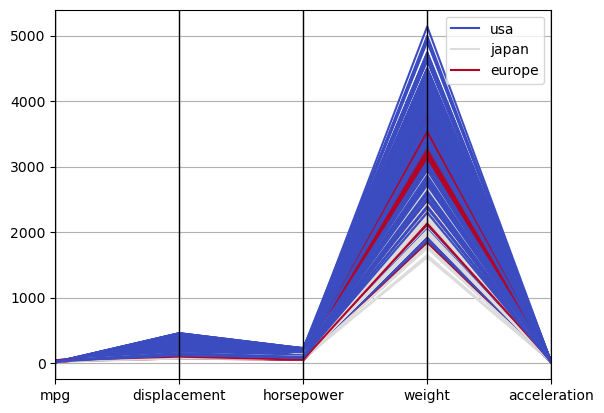

In [10]:
# Now lets looks at another dataset and compare

mpg = sns.load_dataset('mpg').dropna()

mpg.head()

mpg['origin'].value_counts()

# lets go with origin for the class and we will drop name, cylinders and model year.

mpg3 = mpg.drop(['name','model_year','cylinders'],axis = 1)

pd.plotting.parallel_coordinates(mpg3, 'origin',colormap = 'coolwarm')

# Looks liek we will need to scale to see a little better

<Axes: >

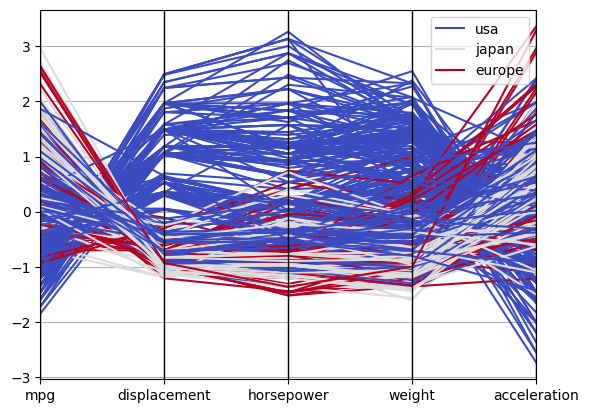

In [11]:
# lets scale

mpg2 = zscore(mpg.drop(['name','origin','model_year','cylinders'],axis = 1))

mpg2['origin'] = mpg['origin']

pd.plotting.parallel_coordinates(mpg2, 'origin',colormap = 'coolwarm')

### Comments

It looks like the scaling helped us visualize better though we have alot going on here still. Maybe a different scaler would yield better results for visualization.